In [118]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

In [119]:
import pandas as pd
class StringConverter(dict):

    def __contains__(self, item):

        return True

    def __getitem__(self, item):

        return str

    def get(self, default=None):

        return str

def load_data(data_path = "/Users/vishali/Desktop/SPRING 2021/project-ml"):
    csv_path = os.path.join(data_path, "topcleandata.csv")
    return pd.read_csv(csv_path, low_memory = False)

In [120]:
new = load_data()

In [121]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83566 entries, 0 to 83565
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hv201                           12841 non-null  float64
 1   ha57                            12841 non-null  float64
 2   hc11                            0 non-null      float64
 3   hv204                           12841 non-null  float64
 4   hv205                           12841 non-null  float64
 5   hv206                           12841 non-null  float64
 6   hv207                           12841 non-null  float64
 7   hv208                           12841 non-null  float64
 8   hv209                           12841 non-null  float64
 9   hv210                           12841 non-null  float64
 10  hv211                           12841 non-null  float64
 11  hv212                           12841 non-null  float64
 12  hv213                           

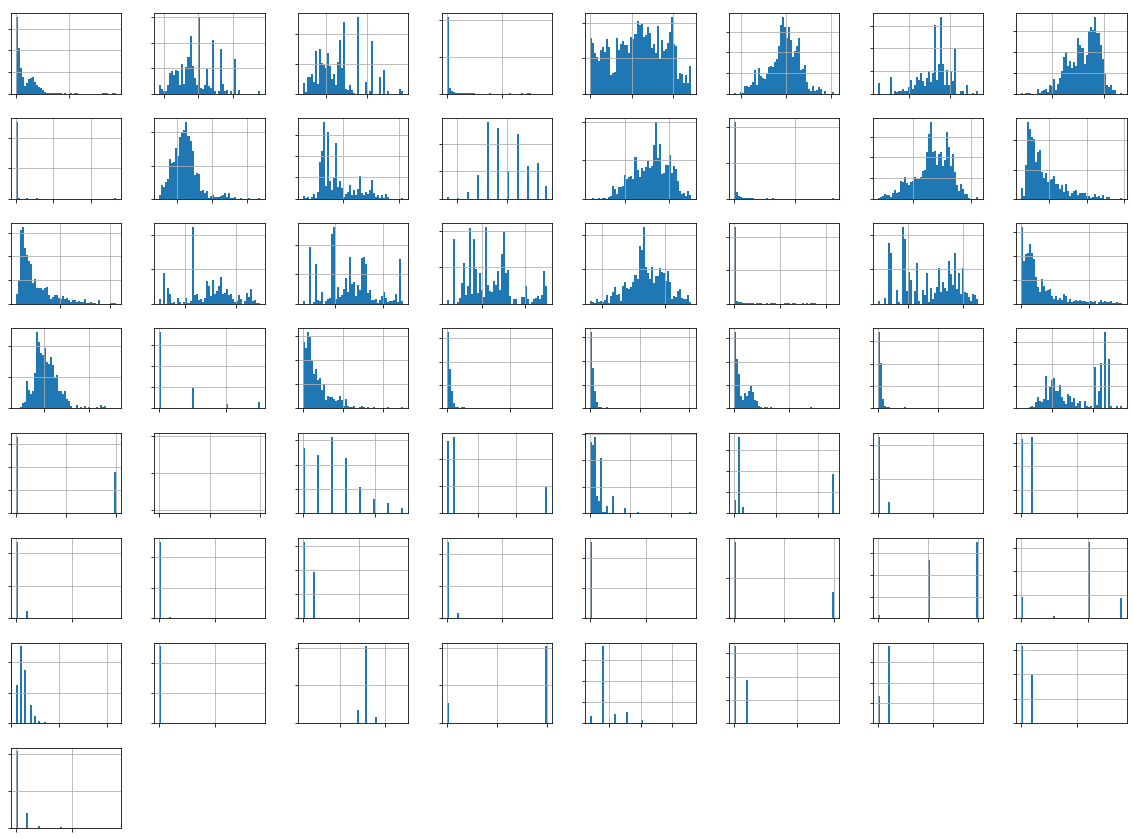

In [122]:
%matplotlib inline
import matplotlib.pyplot as plt
new.hist(bins=50, figsize=(20,15))
plt.show()

In [123]:
new = new.dropna(subset=['ha57'])

In [127]:
new['ha57'] = pd.Categorical(new.ha57)

In [128]:
y = new['ha57']

In [129]:
y.describe()

count     12841.0
unique        2.0
top           0.0
freq       8339.0
Name: ha57, dtype: float64

In [130]:
X = new.drop(['ha57', 'hc11','DHSCC', 'DHSCLUST'], axis = 1)

In [131]:
X.describe()

,hv201,hv204,hv205,hv206,hv207,hv208,hv209,hv210,hv211,hv212,...,PET_2015,Proximity_to_Water,Rainfall_2015,SMOD_Population_2015,Travel_Times_2015,U5_Population_2005,U5_Population_2015,UN_Population_Count_2015,UN_Population_Density_2015,Wet_Days_2015
count,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000,...,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000
mean,3.397633,42.178179,7.572463,0.127716,0.509306,0.092205,0.023285,0.377385,0.064948,0.010825,...,3.361567,52225.143015,1047.216903,0.452068,89.548603,62.916138,82.794206,89004.760834,598.809143,13.004483
std,4.492480,51.092237,10.456671,0.365846,0.505510,0.325790,0.198914,0.490501,0.257570,0.127733,...,0.478913,55978.808795,287.723975,0.833991,88.575005,147.297777,192.186932,106834.032449,1315.795345,3.049468
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.450000,0.000000,373.818182,0.000000,0.000000,0.279527,0.382598,47.931122,0.151325,6.175833
25%,1.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.958333,15864.897360,860.400000,0.000000,29.733333,8.975997,12.279464,18009.960938,90.190898,10.200833
50%,2.000000,30.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.350000,32533.588980,1008.400000,0.000000,61.078591,29.028429,38.236400,49095.031250,291.320443,12.447499
75%,2.000000,60.000000,24.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,3.791667,67410.777170,1184.100000,1.000000,120.142857,60.846472,78.429549,143249.562500,547.835074,15.912499
max,14.000000,500.000000,24.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,4.283333,295739.776600,2589.000000,3.000000,628.839142,1574.178850,2028.777204,913433.375000,16723.025670,18.550833


In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [133]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 0.1, solver = 'liblinear', random_state = 42)
lr.fit(X_train,y_train)

LogisticRegression(C=0.1, random_state=42, solver='liblinear')

In [134]:
y_pred_LR = lr.predict(X_test)

In [135]:
from sklearn.metrics import classification_report, confusion_matrix
CM = confusion_matrix(y_test, y_pred_LR)
print(confusion_matrix(y_test, y_pred_LR))
print(classification_report(y_test, y_pred_LR))


TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

# True Negative Rate | Specificity

TNR = TN / (TN + FP)
print(TNR)

# When true positive + false positive == 0, precision returns 0 and raises UndefinedMetricWarning. This behavior can be modified with zero_division.

from sklearn.metrics import precision_score
precision_score(y_test, y_pred_LR, average=None, zero_division=1)

[[1554  130]
 [ 759  126]]
              precision    recall  f1-score   support

         0.0       0.67      0.92      0.78      1684
         1.0       0.49      0.14      0.22       885

    accuracy                           0.65      2569
   macro avg       0.58      0.53      0.50      2569
weighted avg       0.61      0.65      0.59      2569

0.9228028503562945


array([0.67185473, 0.4921875 ])

In [136]:
# or using accuracy scores
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_LR)

0.6539509536784741

In [104]:
# ROC curve 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_pred_LR, y_test)
roc_auc = auc(fpr, tpr)
roc_auc

ValueError: y_true takes value in {3.0, 4.0} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [137]:
# Hyperparamter Tuning for Logistic

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# we find hyperparamter for c-value (inverse of regularization strength in Logistic Regression)
solvers = ['liblinear']
c_values = [1.0,2.0, 0.1]
grid = dict(solver=solvers,C=c_values)
model = LogisticRegression()
# define grid search
grid_search = GridSearchCV(estimator = model, param_grid = c_values, n_jobs = 1)
grid_result = grid_search.fit(X, y)
print (grid_search.best_score_, grid_search.best_params_)

AttributeError: 'float' object has no attribute 'items'

In [139]:
# define models and parameters
model = LogisticRegression()
solvers = ['liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

In [140]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.651948 using {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.651170 (0.009515) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.651948 (0.007956) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.650598 (0.009429) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.651040 (0.009912) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.651507 (0.009342) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [53]:
# Decision Trees


from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [54]:
y_pred = classifier.predict(X_test)

In [56]:
from sklearn.metrics import classification_report, confusion_matrix
CM = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]


# True Negative Rate | Specificity

TNR = TN / (TN + FP)
print(TNR)


# or using accuracy scores
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


# ROC curve 

from sklearn.metrics import roc_curve
from sklearn.metrics import auc



[[   0    1    7    8    1]
 [   1   44   71   87   11]
 [   4   83  204  347   26]
 [  10   89  405 1114   52]
 [   1   13   43   52    9]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        17
         2.0       0.19      0.21      0.20       214
         3.0       0.28      0.31      0.29       664
         4.0       0.69      0.67      0.68      1670
         9.0       0.09      0.08      0.08       118

    accuracy                           0.51      2683
   macro avg       0.25      0.25      0.25      2683
weighted avg       0.52      0.51      0.51      2683

0.0


In [57]:
# Grid search for Decision Trees

from sklearn import tree
from sklearn.model_selection import GridSearchCV
import random
from random import randint

In [58]:
max_depth_range = range(1,10)
min_samples_leaf_range = range(1,10)
parameters = {'criterion': ['gini'], 'max_depth': max_depth_range, 'min_samples_leaf': min_samples_leaf_range}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4, cv= 5)
clf.fit(X=X, y=y)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
from sklearn.svm import LinearSVR

lin_svr = LinearSVR(max_iter=1000,random_state=42)
lin_svr.fit(X_train_scaled, y_train)
y_pred = lin_svr.predict(X_test)

/Users/vishali/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [63]:
from sklearn.metrics import classification_report, confusion_matrix
CM = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]


# True Negative Rate | Specificity

TNR = TN / (TN + FP)
print(TNR)


# or using accuracy scores
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


# ROC curve 

from sklearn.metrics import roc_curve
from sklearn.metrics import auc


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [ ]:
# gridsearch SVM
# example of grid searching key hyperparametres for SVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)